#ANOMALY DETECTİON

Bu örnek, Z-puanı kullanarak bir anomali tespiti gerçekleştirir. Z-puanı, bir verinin ortalamadan kaç standart sapma uzaklıkta olduğunu gösterir.

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

#scipy.stats: İstatistiksel analizler için kullanılır. Z-puanı hesaplamak için kullanacağız.


In [127]:
# Örnek veri seti oluşturma
np.random.seed(42)
latency = np.random.normal(loc=15, scale=1.5, size=100)  # Latency değerleri
throughput = np.random.normal(loc=10, scale=0.5, size=100)  # Throughput değerleri


"""
loc  = 15 ----> ortalaması 15 olan
scale = 1.5 ----> standart sapması 1.5 olan
size = 100 ---> 100 adet sayı üretir.
    
"""
print(" ")

In [128]:
#anomali ekleme
latency = np.append(latency, [16,11,7,3,12,6,10,9])
throughput = np.append(throughput, [1,3, 6, 9, 12,16,12,12])

In [129]:
#veri setini dataframe'e dönüştürme
df = pd.DataFrame({'latency': latency, 'throughput': throughput})

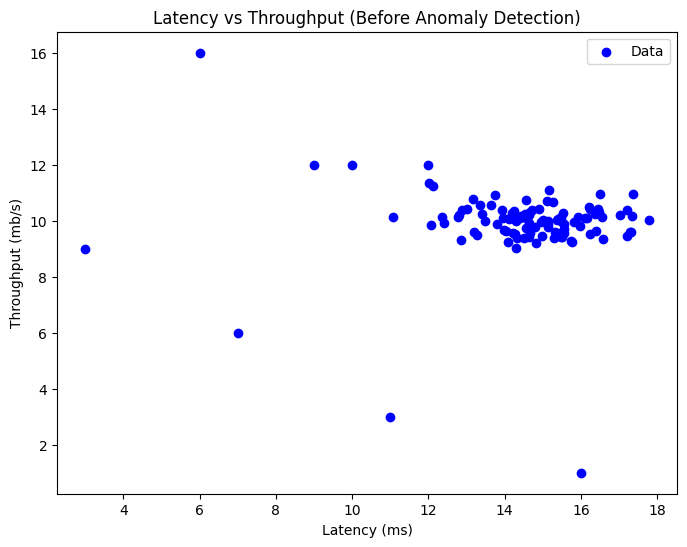

In [130]:
plt.figure(figsize=(8, 6))
plt.scatter(df['latency'], df['throughput'], color='blue', label='Data')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.title('Latency vs Throughput (Before Anomaly Detection)')
plt.legend()
plt.show()

In [131]:
#z score hesaplama
df['z_score_latency'] = np.abs(stats.zscore(df['latency']))
df['z_score_throughput'] = np.abs(stats.zscore(df['throughput']))

#mutlak değer alınır ve z_scorelara eşitlenir.
#Z-skoru, bir veri noktasının, ortalamadan kaç standart sapma uzaklıkta olduğunu gösteren bir değerdir.  

In [132]:
#Anomalileri tespit etme
threshold = 2  #z-puanı eşik değer
df['anomaly'] = (df['z_score_latency'] > threshold) | (df['z_score_throughput'] > threshold)



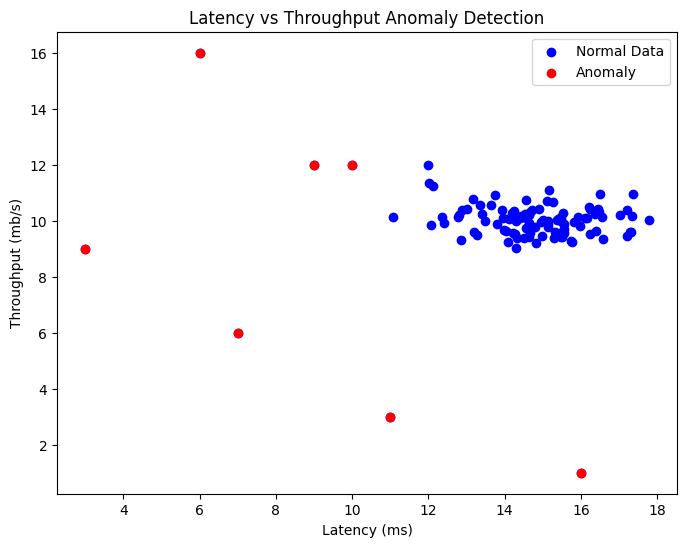

In [133]:
plt.figure(figsize=(8, 6))
plt.scatter(df['latency'], df['throughput'], color='blue', label='Normal Data')
plt.scatter(df[df['anomaly']]['latency'], df[df['anomaly']]['throughput'], color='red', label='Anomaly')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.title('Latency vs Throughput Anomaly Detection')
plt.legend()
plt.show()